In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
# Split the data into features and target
X = df[['YearsExperience']]  # Features (2D array)
y = df['Salary']   # Target (1D array)

In [6]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [31]:
y = np.array(y)

In [32]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Using Sklearn**

In [8]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 49830096.855908334
R² Score: 0.9024461774180498


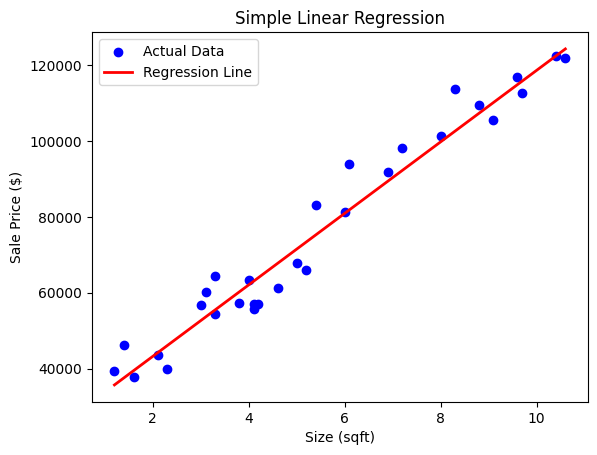

In [11]:
# Plot the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price ($)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [13]:
model.predict([[30]])

C:\Users\5510\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([307094.6611704])

### **From scratch**

In [15]:
def loss(y, x, m, b):
    return (y - ((m*x)+b))**2

In [16]:
def get_gradients(y, x, m, b):
    m_grad = x(y - ((m*x)+b))
    b_grad = y - ((m*x)+b)
    return m_grad, b_grad

In [17]:
n_epochs = 100

In [18]:
alpha = 0.01

In [48]:
np.random.seed(42)  # For reproducibility
m = np.random.randint(-10, 10)
b = np.random.randint(-10, 10)

In [33]:
X = df['YearsExperience']

In [34]:
X = np.array(X)

In [36]:
N = X.shape[0]

In [40]:
m.shape

(31,)

In [58]:
# y_pred = m*x + b
for i in range(n_epochs):
    y_pred = m*X + b 
    cost = (1/N)*(np.sum(y-y_pred)**2)
    m_grad = (-2/N)*(np.sum(X*(y-y_pred)))
    b_grad = (-2/N)*(np.sum(y-y_pred))
    m -= alpha * m_grad
    b -= alpha * b_grad
    print(f'Epoch {i+1}: m = {m}, b = {b}')

Epoch 1: m = 10922.381010758612, b = 14815.855854475234
Epoch 2: m = 10916.3293482135, b = 14857.088953287597
Epoch 3: m = 10910.302558090765, b = 14898.152583455263
Epoch 4: m = 10904.300538164387, b = 14939.047441496865
Epoch 5: m = 10898.323186628493, b = 14979.77422106833
Epoch 6: m = 10892.370402095634, b = 15020.333612974651
Epoch 7: m = 10886.442083595066, b = 15060.726305181604
Epoch 8: m = 10880.538130571033, b = 15100.952982827414
Epoch 9: m = 10874.658442881067, b = 15141.014328234374
Epoch 10: m = 10868.80292079429, b = 15180.91102092043
Epoch 11: m = 10862.97146498971, b = 15220.643737610693
Epoch 12: m = 10857.163976554559, b = 15260.213152248927
Epoch 13: m = 10851.38035698259, b = 15299.619936008976
Epoch 14: m = 10845.620508172426, b = 15338.864757306148
Epoch 15: m = 10839.884332425883, b = 15377.948281808558
Epoch 16: m = 10834.171732446322, b = 15416.871172448411
Epoch 17: m = 10828.482611336993, b = 15455.634089433253
Epoch 18: m = 10822.81687259939, b = 15494.2376

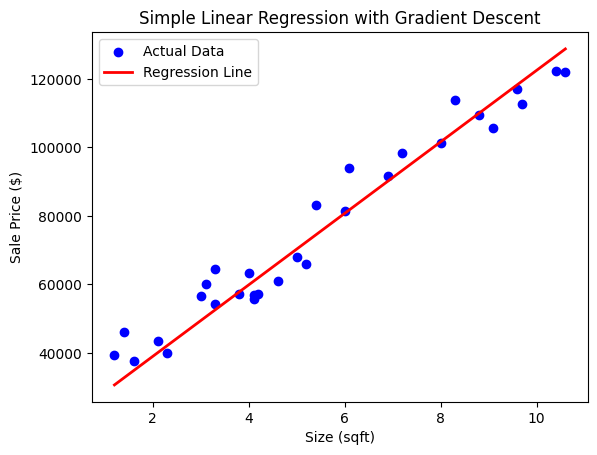

In [59]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, m * X + b, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Size (sqft)')
plt.ylabel('Sale Price ($)')
plt.title('Simple Linear Regression with Gradient Descent')
plt.legend()
plt.show()

In [60]:
mse = np.mean((y - y_pred) ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_res / ss_total)

print(f"Final m: {m}, Final b: {b}")
print(f"MSE: {mse}")
print(f"R-squared: {r_squared}")

Final m: 10429.354124811118, Final b: 18175.102367954238
MSE: 40696394.35499305
R-squared: 0.9439828827108555
